librerias

In [87]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


sacar los datos

In [88]:
digits = datasets.load_digits()
digits_f = datasets.load_digits(as_frame=True)
x = digits.data[:, [0, 2]]
y = digits.target
print(digits_f)


{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        

SVC

dividir y entrenar

In [89]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

clf.fit(X_train, y_train)

SVC(gamma=0.001)

Predicción y resultados

In [90]:
predictedSVC = clf.predict(X_test)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictedSVC)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Matriz de confusion SVC

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


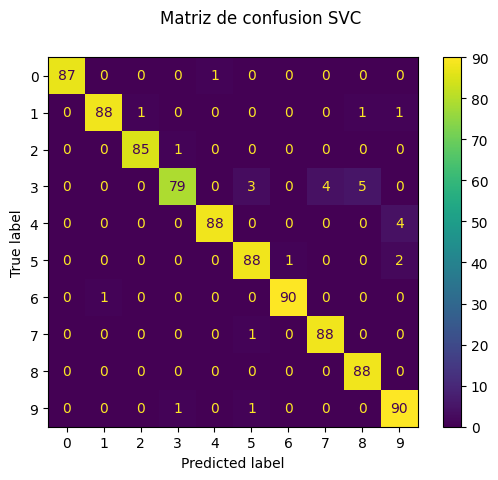

In [91]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictedSVC)
disp.figure_.suptitle("Matriz de confusion SVC")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Random forests

Dividir y entrenar

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Predicción y resultados

In [93]:
predictedRF = rf.predict(X_test)
print(
    f"Classification report for classifier {rf}:\n"
    f"{metrics.classification_report(y_test, predictedRF)}\n"
)

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.95      0.88      0.91        91
           2       0.97      0.91      0.94        86
           3       0.91      0.86      0.88        91
           4       0.97      0.93      0.95        92
           5       0.89      0.93      0.91        91
           6       0.98      0.99      0.98        91
           7       0.92      0.97      0.95        89
           8       0.90      0.88      0.89        88
           9       0.84      0.95      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 80  0  3  0  1  0  0  0  7]
 [ 1  0 78  4  0  0  0  0  0  3]
 [ 0  0  1 78  0  3  0  3  6  0]
 [ 2  0  0  0 86  0  0  2  0  2]
 [ 0  0  0  0  0 85  2  0  0  4]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 86  2  0]
 [ 0  3  1  1  1  4  0  1 77  0]
 [ 0  0  0  0  0  3  0  1  1 87]]


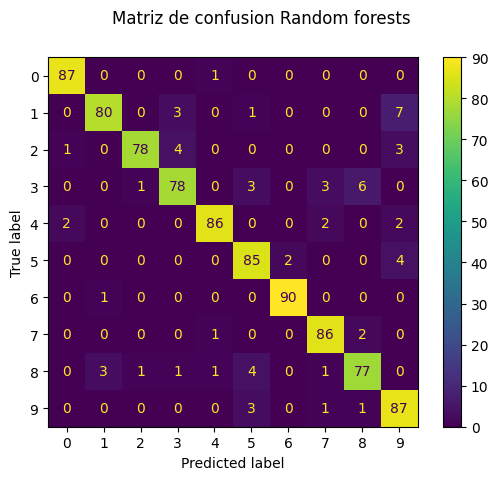

In [94]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictedRF)
disp.figure_.suptitle("Matriz de confusion Random forests")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()